<a href="https://colab.research.google.com/github/danielturg/Road2_AI_Course_Scripts/blob/main/HW3_Road2_AI_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we will work with Fashion MNIST Dataset, so import it and put 60k into train and 10k into test. first i want you to show a few example images from the data, then show a chart of how many images from each category are there (you can make it a pretty pie chart). i want you to build a neural network that receives an image of a clothing item and outputs what category it is, based on the labels from the dataset (so output a category, not the number between 0-9). use softmax at the last layer so you can display the answer as the one with the highest probability. make it fully connected, use cross entropy and adam's optimization algorithm.

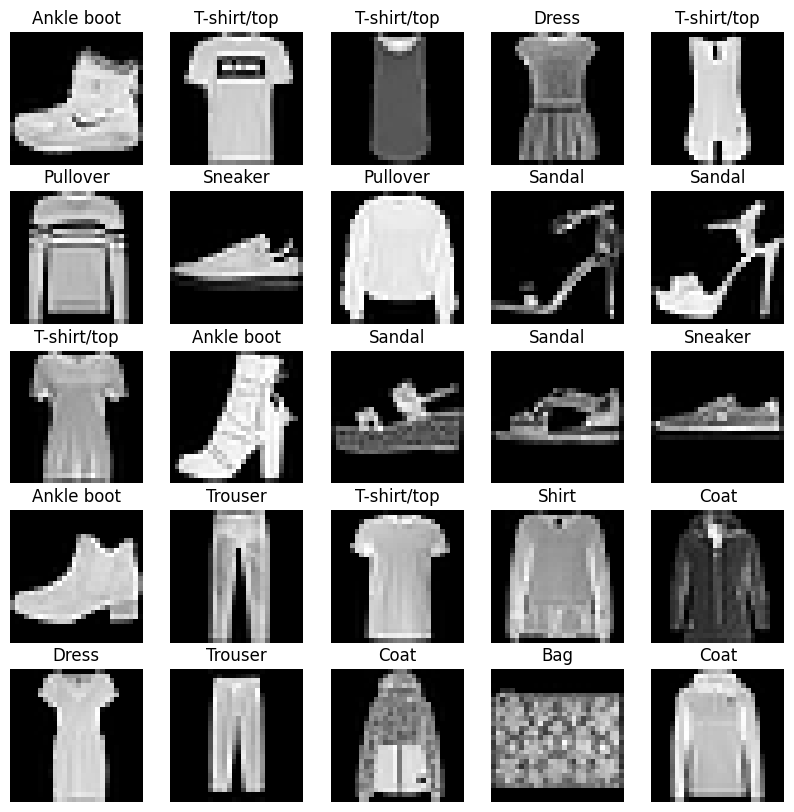

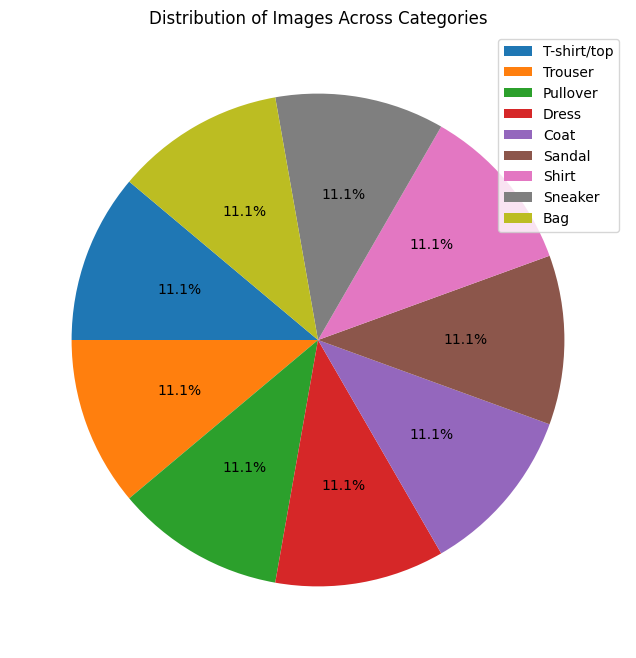

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.8240 - val_loss: 0.4538 - val_accuracy: 0.8405
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8644 - val_loss: 0.4061 - val_accurac

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Map class indices to class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display a few example images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# Count the number of images in each category
category_counts = np.bincount(y_train)

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(category_counts[1:], autopct='%1.1f%%', startangle=140)

# Add labels
plt.legend(patches, class_names, loc="best")
plt.title('Distribution of Images Across Categories')
plt.show()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the neural network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


now write a code to test the network on an image that i give it the path to



1/1 [==============================] - 0s 19ms/step
[[5.0895067e-32 4.8983900e-35 1.1818142e-20 0.0000000e+00 2.7798045e-38
  7.9360159e-22 2.0242651e-17 0.0000000e+00 1.0000000e+00 5.0974995e-22]]


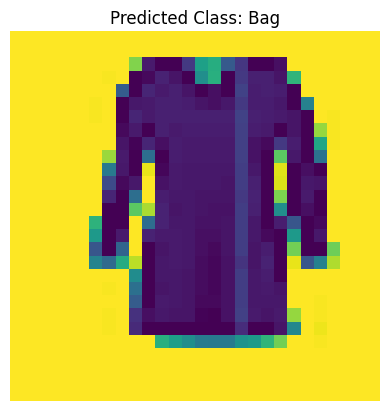

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Provide the path to your test image
test_image_path = '/content/Image-142-from-the-Fashion-MNIST-test-data-set.png'  # Replace with the actual path

# Load and preprocess the test image
test_image = load_and_preprocess_image(test_image_path)

# Make predictions
predictions = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
print(predictions)

# Map the class index to class name
predicted_class_name = class_names[predicted_class_index]

# Display the results
plt.imshow(image.load_img(test_image_path, target_size=(28, 28), color_mode='grayscale'))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()


In [21]:
import cv2  # You may need to install OpenCV: pip install opencv-python

# Load the image you want to test
test_image_path = "/content/Image-142-from-the-Fashion-MNIST-test-data-set.png"  # Change this to the path of your image
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (28, 28))
test_image = test_image / 255.0

# Reshape the image to match the model's expected shape
test_image = np.expand_dims(test_image, axis=0)

# Make predictions
predictions = model.predict(test_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Display the result
print(f"Predicted class: {class_names[predicted_class]}")


1/1 [==============================] - 0s 51ms/step
Predicted class: Bag
